In [4]:
import Pkg
Pkg.add("MultivariateStats")
Pkg.add("GLM")
Pkg.add("DataFrames")
Pkg.add("Distributions")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributions v0.25.77
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
struct MyRange{T<:Number} 
    start:: T
    step:: T
    stop:: T
end

In [3]:

a = MyRange(1,2,20)
a

MyRange{Int64}(1, 2, 20)

In [4]:
function _MyRange(a, i)
    (1<= i <= 1+(a.stop-a.start)//a.step) && (res = a.start + (i-1)*a.step)
    res
end

_MyRange (generic function with 1 method)

In [5]:
_MyRange(a,5)

9

In [6]:
Base.getindex(a::MyRange, i::Int) = _MyRange(a,i)
a[5]

9

In [7]:
struct LazyLinSpace
    start:: Float64
    stop:: Float64
    n:: Int64
end

function Base.getindex(a::MyLinSpace,i::Int)
    dx = (a.stop-a.start)/a.n
    a.start + dx*(i-1)
end



UndefVarError: UndefVarError: MyLinSpace not defined

In [14]:
function interpolate(a, b, x)
    if x <0 && x>1
        println("Out of interpolation range")
    end
    (1-x)*a + x*b
end

mutable struct UnitStepRange{T<:Number} 
    start:: T
    step:: T
    stop:: T
end

Base.getindex(r::UnitStepRange, i::Int64) = _MyRange(r,i)

# (r::StepRange)(i::Float64) = interpolate(r[floor(i)], r[floor(i)+1], i-floor(i))
(r::UnitStepRange)(i::Float64) = interpolate(r[floor(Int, i)], r[floor(Int, i)+1], i-floor(Int, i))

r = UnitStepRange(1,2,20)
println(typeof(r))
r(1.5)

UnitStepRange{Int64}


2.0

In [15]:
mutable struct CallTest
    a::Float64 
end

(c::CallTest)(b::Float64) = c.a*b

c = CallTest(2.0)
c(3.0)

6.0

In [16]:
struct StrangMatrix 
    n
end

function myfunc(A::StrangMatrix, x::Vector)
    y = similar(x)
    n = length(x)
    y[1] = -2x[1] + x[2]
    y[n] = -2x[n] + x[n-1]
    for i in 2:n-1
        y[i] = x[i-1] - 2x[i] + x[i+1]
    end
    y
end

# (A::StrangMatrix)(x::Vector) = myfunc(A, x)
Base.:*(A::StrangMatrix,B::Vector) = myfunc(A, x)

A = StrangMatrix(4)
x = ones(10)

println(x)
# myfunc(A, x)
A*x

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


10-element Vector{Float64}:
 -1.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.0

In [25]:
X = rand(1000, 3)
a0 = rand(3)
y = X * a0 + 0.1 * rand(1000)

X2 = cat(ones(1000), X, dims=2)
# println(size(X))

# beta = ((X.t*X)^-1)*X.t*y
# beta

println(X2\y)

using MultivariateStats, Statistics
a = llsq(X2,y;bias=false)
println(a)

rmse = sqrt(((y - X2*a)'*(y - X2*a))/1000)
# rmse = sqrt(mean(abs2.(y - X2*a)))
print("rmse = $rmse")

[0.05098327522824359, 0.21872861818309744, 0.017593441459111143, 0.045988278300904496]
[0.05098327522824309, 0.2187286181830977, 0.01759344145911144, 0.04598827830090493]
rmse = 0.029377280110492326

In [26]:
rmse = sqrt(mean(abs2.(y - X2*a)))


0.029377280110492322

In [34]:
using DataFrames, GLM
data = DataFrame(X1=X[:,1], X2=X[:,2], X3=X[:,3], Y=y)

Row,X1,X2,X3,Y
,Float64,Float64,Float64,Float64
1,0.648309,0.352592,0.189093,0.240642
2,0.627613,0.988237,0.583481,0.217329
3,0.289442,0.700444,0.35825,0.188937
4,0.503363,0.983896,0.210677,0.179517
5,0.110533,0.169031,0.85903,0.101016
6,0.537267,0.0951864,0.775432,0.178607
7,0.582638,0.420461,0.388851,0.250819
8,0.324283,0.932008,0.418572,0.198945
9,0.967215,0.199166,0.518492,0.251593


In [33]:
OLS = lm(@formula(Y~X1+X2+X3), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X1 + X2 + X3

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.0509833  0.00294223  17.33    <1e-58  0.0452096  0.056757
X1           0.218729   0.00313422  69.79    <1e-99  0.212578   0.224879
X2           0.0175934  0.00334146   5.27    <1e-06  0.0110363  0.0241505
X3           0.0459883  0.00320579  14.35    <1e-41  0.0396974  0.0522792
─────────────────────────────────────────────────────────────────────────

[2.0289697511866085, -0.01744061692528428]


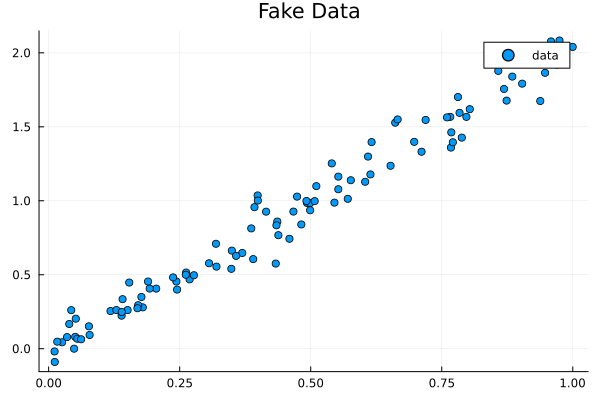

In [58]:
# Data For Regression Problem Part 2
X = rand(100);
y = 2X  + 0.1 * randn(100);

a = llsq(X,y;bias=true)
println(a)

using Plots
scatter(X,y, title="Fake Data ", label="data")

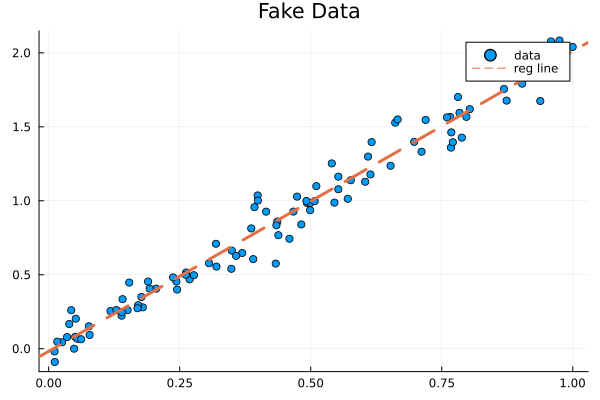

In [59]:
Plots.abline!(a[1], a[2], line=:dash, lw=3, label="reg line")

## Type Hierarchy Problem

In [2]:
abstract type AbstractPerson end
abstract type AbstractStudent <: AbstractPerson end

struct Person <: AbstractPerson
    name
end

struct Student <: AbstractStudent
    name
    grade
end

struct GraduateStudent <: AbstractStudent
    name
    grade
end

function print_info(x::AbstractPerson)
    println(x.name)
end

function print_info(x::AbstractStudent)
    println(x.name)
    println(x.grade)
    
end


print_info (generic function with 2 methods)

In [4]:
a = Person("jess")
b = Student("rouss", "70")

print_info(a)
print_info(b)

jess
rouss
70


## Distribution Quantile Problem (From Josh Day)

In [8]:
using Distributions

function newton(d::UnivariateDistribution, q, θ0)
    θn = θ0
    for _ in 1:50
        θn = θn - (cdf(d, θn) - q)/pdf(d, θn)
    end
    θn
end


newton (generic function with 1 method)

In [10]:
d = Normal()
newton(d, 0.25, 0)

-0.6744897501960817

In [11]:
quantile(d,0.25)

-0.6744897501960818